# Studi kasus Underfitting


## Memuat Dataset untuk Kasus Underfitting

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset (breast cancer dataset)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
# Model underfitting (Decision Tree dengan max_depth rendah)
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [3]:
# Prediksi 
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

## Mendeteksi Underfitting

### Evaluasi peforma pada data latih dan data uji

In [4]:
# Evaluasi peforma pada data latih dan uji
train_acc_underfit = accuracy_score(y_train, y_train_pred_underfit)
tes_acc_underfit = accuracy_score(y_test, y_test_pred_underfit)

print(f'Underfit model training accuracy: {train_acc_underfit}')
print(f'Underfit model test accuracy: {tes_acc_underfit}')

Underfit model training accuracy: 0.9246231155778895
Underfit model test accuracy: 0.8947368421052632


dari hasil ini, kita dapat melihat bahwa meskipun model memiliki akurasi yang cukup baik pada data latih (92.46%), akurasinya sedikit menurun dalam data uji (89.47%). perbedaan ini menunjukkan bahwa model tidak terlalu menyesuaikan diri dengan data latih, tetapi juga tidak menangkap pola yang cukup baik untuk memprediksi data uji dengan akurasi lebih tinggi. ini adalah indikasi model mengalami underfittting

### Learning Curve

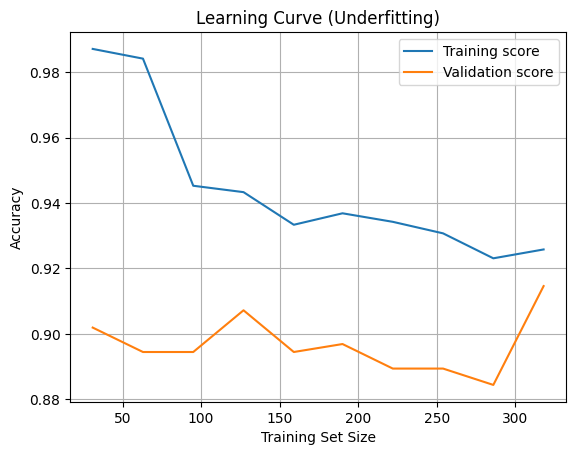

In [5]:
# Learning curve untuk memeriksa peforma pada berbagai ukuran data latih
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

jika learning curve menunjukkan bahwa baik skor pelatihan maupun skor validasi tidak meningkat secara signifikan dengan bebrtambahnya ukuran data, ini mengindikasikan bahwa model mungkin tidak cukup kompleks untuk menangkap pola dalam data. ini merupakan tanda underfitting. grafik ini membantu anda memahami bahwa model mungkin terlalu sederhana dan menunjukkan perlunya model yang lebih kompleks untuk meningkatkan peforma

### Pemeriksaan kompleksitas model 


In [7]:
# Membandingkan dengan model yang lebih kompleks (e.g., max_depth=5)
model_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
model_complex.fit(X_train, y_train)
 
y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)
 
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)
 
print(f"Complex Model Training Accuracy: {train_acc_complex}")
print(f"Complex Model Test Accuracy: {test_acc_complex}")

Complex Model Training Accuracy: 0.9949748743718593
Complex Model Test Accuracy: 0.9532163742690059


## Mengatasi Underfitting


### Gunakan Model yang Lebih Kompleks

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Menggunakan model yang lebih kompleks dengan max_depth lebih besar
complex_model = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model.fit(X_train, y_train)

# Prediksi pada data latih dan uji
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)

# Evaluasi performa 
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)

print(f'Training Accuracy (Complex Model): {train_acc_complex}')
print(f'Test Accuracy (Complex Model): {test_acc_complex}')

Training Accuracy (Complex Model): 1.0
Test Accuracy (Complex Model): 0.9415204678362573


dengan menggunakan model yang lebih kompleks, anda akan melihat peningkatan signifikan dalam akurasi, baik pada data latih maupun data uji. ini menunjukkan bahwa model sekarang mampu menangkap pola data dan mengatasi masalah underfitting yang sebelumnya ada

### Tambahkan lebih banyak fitur (feature engineering dengan pca)

pca adalah teknik untuk mereduksi dimensi data sambil mempertahankan informasi yang paling penting. dengan menghasilkan fitur baru dari data asli, PCA dapat membantu model dalam memahami pola yang lebih komoleks

dalam mencoba pendekatan ini, pertama tama kita normalisasi data dengan StandardScaler, kemudian menerapkan PCA untuk menghasilkan fitur baru dari data yang telah dinormalisasi. setelah itu, kita melatih model DecisionTreeClassifier yang sama dengan parameter max_depth 10 menggunakan fitur hasil PCA

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# PCA untuk mengurangi dimensi atau menghasilkan fitur baru
pca = PCA(n_components=5)  # Menghasilkan fitur baru dari data asli
X_pca = pca.fit_transform(X_scaled)
 
# Membagi data menjadi data latih dan data uji
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
 
# Model dengan fitur hasil PCA
complex_model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model_pca.fit(X_train_pca, y_train_pca)
 
# Prediksi pada data latih dan uji
y_train_pred_pca = complex_model_pca.predict(X_train_pca)
y_test_pred_pca = complex_model_pca.predict(X_test_pca)
 
# Evaluasi performa
train_acc_pca = accuracy_score(y_train_pca, y_train_pred_pca)
test_acc_pca = accuracy_score(y_test_pca, y_test_pred_pca)
 
print(f"Training Accuracy (PCA): {train_acc_pca}")
print(f"Test Accuracy (PCA): {test_acc_pca}")

Training Accuracy (PCA): 1.0
Test Accuracy (PCA): 0.9415204678362573


dengan menerapkan PCA serta menambahkan fitur baru, kita bisa melihat bahwa akurasi model pada data latih uji meningkat secara signifikan. ini menunjukkan bahwa model sekarang lebih mampu menangkap pola pola kompleks dalam data sehingga mengurangi masalah underfitting yang ada sebelumnya


### Hyperparameter Tuning Menggunakan GridSearchCV

Hyperparameter Tuning adalah proses mencari kombinasi terbaik dari parameter model untuk meningkatkan kinerja model. salah satu alat yang berguna untuk tugas ini adalah GridSearchCV. ini memungkinkan kita mengeksplorasi berbagai kombinasi hyperparameter secara sistematis

In [14]:
from sklearn.model_selection import GridSearchCV

# Grid Search untuk hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
 
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
 
# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)
 
# Hyperparameter terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
 
# Prediksi dengan model terbaik
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)
 
# Evaluasi performa
train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)
 
print(f"Training Accuracy (Best Model): {train_acc_best}")
print(f"Test Accuracy (Best Model): {test_acc_best}")
print(f"Best Params: {best_params}")

Training Accuracy (Best Model): 0.9949748743718593
Test Accuracy (Best Model): 0.9532163742690059
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


dengan melakukan hyperparameter tuning, kita bisa melihat peningkatan signifikan dalam akurasi model pada data latih dan data uji. ini menunjukkan bahwa model kini lebih sesuai dengan data dan dapat menangani pola yang lebih kompleks serta mengatasi underfitting sebelumnya


### Preprocessing Data

salah satu teknik penting adalah normalisasi data. ini memastikan bahwa fitur memiliki skal yang sama sehingga model dapat belajar dengan lebih efektif

Untuk meningkatkan performa model, kita melakukan normalisasi ulang pada data. Anda bisa menggunakan StandardScaler untuk menstandardisasi fitur sehingga memiliki rata-rata 0 dan standar deviasi 1. Setelah itu, kita membagi data menjadi data latih dan data uji, kemudian melatih model DecisionTreeClassifier dengan parameter max_depth yang lebih besar.

In [18]:
# Melakukan normalisasi ualng dengan scaler 
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X)

# Membagi ulang data latih dan uji
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)

# Model setelah preprocessing data lebih baik 
model_after_scaling = DecisionTreeClassifier(max_depth=10, random_state=42)
model_after_scaling.fit(X_train_scaled, y_train_scaled)

# Prediksi 
y_train_pred_scaled = model_after_scaling.predict(X_train_scaled)
y_test_pred_scaled = model_after_scaling.predict(X_test_scaled)

# Evaluasi peforma 
train_acc_scaled = accuracy_score(y_train_scaled, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test_scaled, y_test_pred_scaled)

print(f"Training Accuracy (After Scaling): {train_acc_scaled}")
print(f"Test Accuracy (After Scaling): {test_acc_scaled}")

Training Accuracy (After Scaling): 1.0
Test Accuracy (After Scaling): 0.9415204678362573


### Tambahkan Data Latih

untuk memperbaiki peforma model, kita dapat memperbesar ukuran data latih. kita membagi ulang data dengan meningkatkan proporsi data latih dan mengurangi ukuran data uji. kemudian, kita melatih model DecissionTreeClassifier dengan parameter max depth lebih besar menggunakan data latih lebih besar


In [19]:
# Membagi ulang adata dengan lebih banyak data latih (menambah ukuran training set)
X_train_more_data, X_test_less_data, y_train_more_data, y_test_less_data = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model dengan lebih banyak data latih 
model_more_data = DecisionTreeClassifier(max_depth=10, random_state=42)
model_more_data.fit(X_train_more_data, y_train_more_data)

# Prediksi 
y_train_pred_more_data = model_more_data.predict(X_train_more_data)
y_test_pred_more_data = model_more_data.predict(X_test_less_data)
4# Evaluasi peforma 
train_acc_more_data = accuracy_score(y_train_more_data, y_train_more_data)
test_acc_more_data = accuracy_score(y_test_less_data, y_test_pred_more_data)
 
print(f"Training Accuracy (More Data): {train_acc_more_data}")
print(f"Test Accuracy (More Data): {test_acc_more_data}")


Training Accuracy (More Data): 1.0
Test Accuracy (More Data): 0.9473684210526315
